# Credit Card Fraud Detection using Machine Learning

**Objective:**  
The goal of this project is to build a machine learning model that can **detect fraudulent credit card transactions**
- Preprocess and normalize the dataset  
- Handle class imbalance  
- Train Logistic Regression and Random Forest classifiers  
- Evaluate performance using **accuracy, precision, recall, F1-score**, **confusion matrix**, and ROC curve


In [51]:
# Libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')



## 🔹Data Loading
Loaded the anonymized credit card transaction dataset from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), containing thousands of records labeled as genuine or fraudulent.  
Reviewed data shape and columns to prepare for analysis.

In [52]:
import pandas as pd

data = pd.read_csv(r"C:\Users\fathi\Downloads\creditcard.csv\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🔹Initial Class Distribution
Plotted the class distribution to highlight that only a tiny fraction of transactions are fraudulent.  
This step justifies the use of oversampling methods for effective fraud detection modeling.

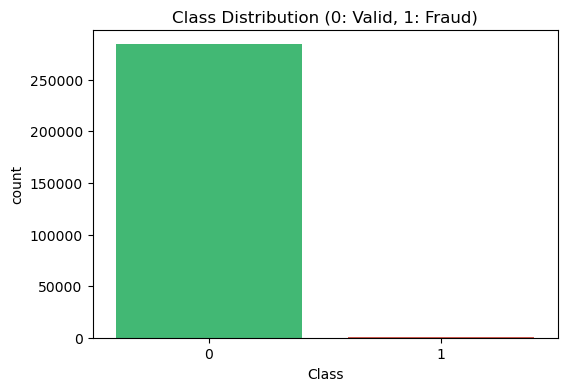

In [53]:

# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette=['#2ecc71','#e74c3c'])
plt.title("Class Distribution (0: Valid, 1: Fraud)")
plt.show()


## 🔹 Preprocessing and Normalization

- Normalize `Amount` using StandardScaler  
- Prepare dataset for training


In [54]:

scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

## 🔹 Split Dataset and handling Class Imbalance (SMOTE)

- Separate features (X) and target (y)  
- Split into train (80%) and test (20%) sets  
- Kept class ratios consistent to reflect the real-world scenario where fraudulent transactions are rare.
- Used SMOTE to create synthetic fraud examples in the training set, achieving a balanced dataset.
- Confirmed the new balanced distribution visually to ensure the model will learn to recognize both classes equally.

In [55]:
X = data.drop('Class', axis=1)
Y = data['Class']

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
smote = SMOTE(random_state=42)
xTrain_smote, yTrain_smote = smote.fit_resample(xTrain, yTrain)




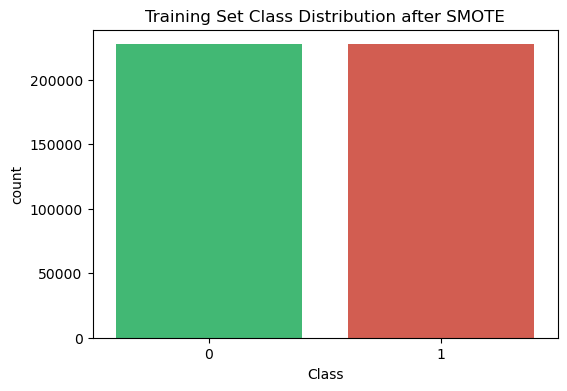

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x=yTrain_smote, palette=['#2ecc71','#e74c3c'])
plt.title('Training Set Class Distribution after SMOTE')
plt.show()


## 🔹Model Training
Trained Logistic Regression and Random Forest classifiers on the balanced data.  
These models are strong baselines for fraud classification problems and commonly used in the industry.


In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=300, random_state=42)
logreg.fit(xTrain_smote, yTrain_smote)


LogisticRegression(max_iter=300, random_state=42)

In [58]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=10, n_jobs=-1, random_state=42)
rfc.fit(xTrain_smote, yTrain_smote)


RandomForestClassifier(max_depth=10, n_estimators=30, n_jobs=-1,
                       random_state=42)

In [59]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [60]:
y_pred_lr = logreg.predict(xTest)          # Predicted classes
y_prob_lr = logreg.predict_proba(xTest)[:, 1]  # Probability estimates for ROC


In [61]:
y_pred_rf = rfc.predict(xTest)
y_prob_rf = rfc.predict_proba(xTest)[:, 1]


## 🔹Model Evaluation
Tested both models on the original imbalanced test set and calculated all key metrics:
- Accuracy
- Precision
- Recall
- F1-Score

| Model               | Accuracy (%) | Precision (%) | Recall (%) | F1-Score (%) |
|---------------------|-------------|--------------|------------|--------------|
| Logistic Regression |   97.43     |    5.81      |   91.84    |    10.94     |
| Random Forest       |   99.77     |   41.87      |   86.73    |    56.48     |

Random Forest achieved the best overall trade-off between catching fraud and limiting false alarms.


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for Logistic Regression
acc_lr = accuracy_score(yTest, y_pred_lr)
prec_lr = precision_score(yTest, y_pred_lr)
rec_lr = recall_score(yTest, y_pred_lr)
f1_lr = f1_score(yTest, y_pred_lr)

# Metrics for Random Forest
acc_rf = accuracy_score(yTest, y_pred_rf)
prec_rf = precision_score(yTest, y_pred_rf)
rec_rf = recall_score(yTest, y_pred_rf)
f1_rf = f1_score(yTest, y_pred_rf)

print(f"Logistic Regression - Accuracy: {acc_lr:.4f}, Precision: {prec_lr:.4f}, Recall: {rec_lr:.4f}, F1: {f1_lr:.4f}")
print(f"Random Forest       - Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1: {f1_rf:.4f}")


Logistic Regression - Accuracy: 0.9743, Precision: 0.0581, Recall: 0.9184, F1: 0.1094
Random Forest       - Accuracy: 0.9977, Precision: 0.4187, Recall: 0.8673, F1: 0.5648


## 🔹Confusion Matrix Visualization
Visualized confusion matrices for both classifiers. These show the breakdown of correctly and incorrectly classified cases in each class and help assess the real-world cost of errors.


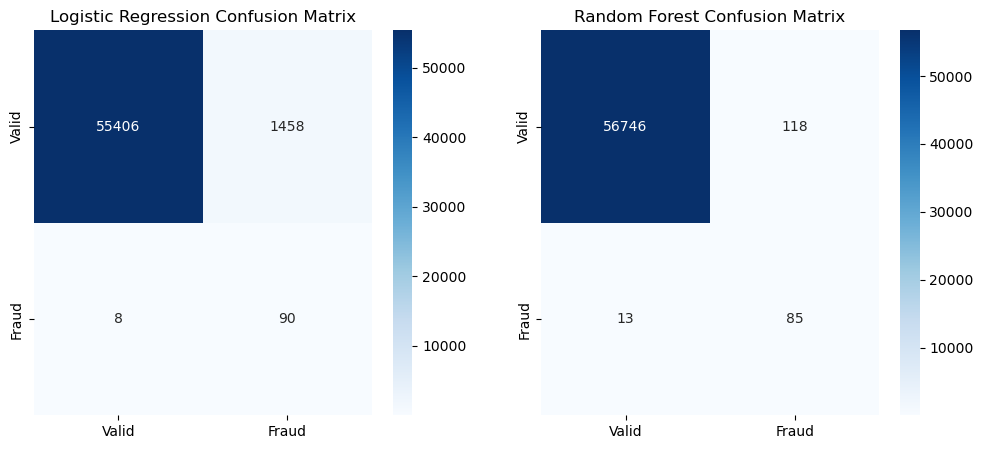

In [63]:
# Confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(yTest, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(yTest, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()

## 🔹ROC Curve Comparison
Plotted ROC curves and calculated AUC for both models to compare their capacity to distinguish fraud versus valid transactions across all possible classification thresholds.

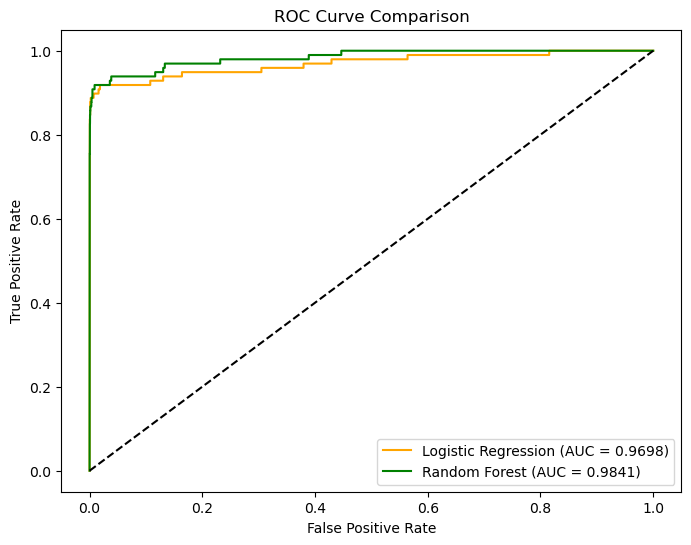

In [64]:

# ROC Curve Comparison
fpr_lr, tpr_lr, _ = roc_curve(yTest, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(yTest, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', color='orange')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## 🔹Correlation Matrix Heatmap
-Generated a feature correlation heatmap to assess relationships between variables.  
-High feature correlation can signal redundancy and inform next steps in feature selection.

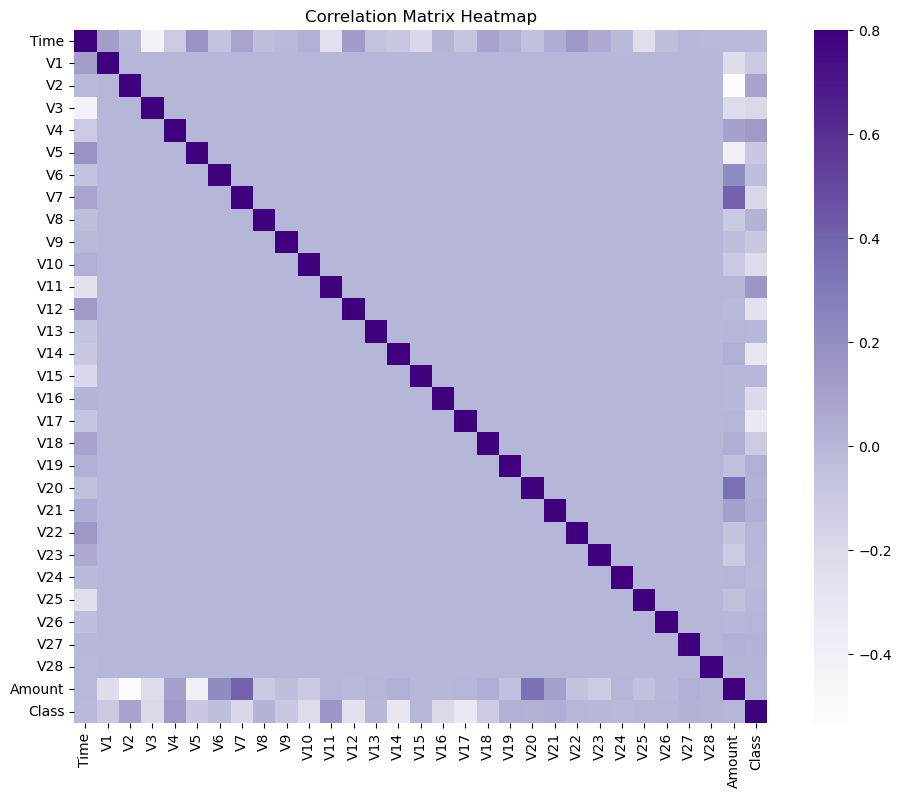

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='Purples', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()



## 🔹Conclusion and Insights
- Handling class imbalance is crucial for fraud detection; SMOTE improved model learning.
- Random Forest performed better than Logistic Regression, especially in precision and F1-score.
- High recall was achieved, but precision remained low due to the rarity of fraud cases.
- Evaluating with multiple metrics (not just accuracy) gives a clearer picture of model performance.
- Further improvements could be made by tuning model parameters or trying advanced algorithms.

